In [2]:
pip install emoji

In [3]:
pip install joblib

In [4]:
pip install langdetect

In [5]:
pip install pytest-warnings

In [6]:
pip install wrap

In [2]:
from textwrap import wrap

import emoji
import joblib
import langdetect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

In [51]:
def get_category_dict(category_file):
  category = pd.read_json(category_file, orient="records")
  category = pd.DataFrame(category["items"].values.tolist())

  return{
      cat.id: cat.snippet.get("title")
      for cat in category.itertuples(index=False)
  }

In [52]:
category_dict = get_category_dict("D:/KULIAH/PELATIHAN DATA/category.json")

In [53]:
trending = pd.read_csv("D:/KULIAH/PELATIHAN DATA/trending.csv",parse_dates=["publish_time", "trending_time"])

with pd.option_context("display.max_columns", None):
  display(trending.head())

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05 09:00:34+00:00,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,none,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,2d,hd,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04 15:54:08+00:00,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,none,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,2d,hd,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06 03:00:22+00:00,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,none,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,2d,hd,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05 20:26:08+00:00,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,none,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,2d,hd,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03 23:14:54+00:00,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,none,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,2d,hd,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In [54]:
start_date = trending.trending_time.min()
end_date = trending.trending_time.max()

print(f"{start_date = }")
print(f"{end_date = }")

start_date = Timestamp('2021-02-07 05:46:51.832614+0000', tz='UTC')
end_date = Timestamp('2022-11-19 06:02:12.845027+0000', tz='UTC')


In [55]:
#delete data dari bulan februari-juni

filtered_trending = trending[trending.trending_time.dt.month >= 7]

start_date = filtered_trending.trending_time.min()
end_date = filtered_trending.trending_time.max()

print(f"{start_date = }")
print(f"{end_date = }")

start_date = Timestamp('2021-07-01 06:01:25.524449+0000', tz='UTC')
end_date = Timestamp('2022-11-19 06:02:12.845027+0000', tz='UTC')


In [56]:
num_videos = filtered_trending.shape[0]
print(f"{num_videos = }")

num_videos = 63718


In [57]:
#ditribusi mmissing vallue

filtered_trending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63718 entries, 21322 to 118750
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           31918 non-null  object             
 1   publish_time       63718 non-null  datetime64[ns, UTC]
 2   channel_id         63718 non-null  object             
 3   title              63718 non-null  object             
 4   description        61486 non-null  object             
 5   thumbnail_url      31918 non-null  object             
 6   thumbnail_width    31918 non-null  float64            
 7   thumbnail_height   31918 non-null  float64            
 8   channel_name       63718 non-null  object             
 9   tags               55466 non-null  object             
 10  category_id        63718 non-null  int64              
 11  live_status        63718 non-null  object             
 12  local_title        63718 non-null  object

In [59]:
#delete video dengan description kosong

filtered_trending.dropna(subset=["description"], inplace=True)

In [60]:
trending_by_date = filtered_trending.groupby(
filtered_trending.trending_time.dt.date)

num_trending_per_day = trending_by_date.trending_time.count()
print("Number of videos in trending per day:", num_trending_per_day.unique())

Number of videos in trending per day: [195 196 197 198 194 193 192 191 190 188 187 185 189 186 184 183 132 182
 181 179 176 172 155 144 149 148 141 140 131 129 145 167 163 157 156 175
 169 199 200]


In [61]:
trending_duration = filtered_trending.groupby("title").agg(
trending_duration=pd.NamedAgg(column="trending_time", aggfunc="count"),
trending_start_date=pd.NamedAgg(column="trending_time", aggfunc="min"),
trending_last_date=pd.NamedAgg(column="trending_time", aggfunc="max")
).sort_values("trending_duration", ascending=False).reset_index()
trending_duration.head(10)

,title,trending_duration,trending_start_date,trending_last_date
0,"JEJE PENGHUNI STASIUN DUKUH ATAS, PERNAH CABUT...",37,2022-07-02 06:01:31.621150+00:00,2022-08-07 06:01:00.607537+00:00
1,Toleransi antar tetangga di Korea🇰🇷.. 🤦🏻‍♂️,37,2022-07-02 06:01:31.621606+00:00,2022-08-07 06:01:00.607651+00:00
2,"NEGO 1 GEROBAK SHAWARMA VIRAL DI TIKTOK, SAMPE...",36,2022-07-08 06:01:39.900318+00:00,2022-08-12 06:01:33.892049+00:00
3,"Tantangin VYN Pake Franco, 1 Kali Kena Hook Da...",35,2022-07-01 06:01:38.284040+00:00,2022-08-04 06:02:04.519603+00:00
4,OPW ARES Sudah Tamat,35,2022-07-02 06:01:31.621296+00:00,2022-08-05 06:02:43.644196+00:00
5,SINGAPORE STREET FOOD #08,35,2022-07-02 06:01:31.621620+00:00,2022-08-06 06:02:02.694750+00:00
6,Kok di Indonesia ada penjual Rawon yg lebih pi...,34,2022-07-02 06:01:31.621592+00:00,2022-08-04 06:02:04.519738+00:00
7,SELAMAT LEBARAN GUYS!!!,33,2022-07-11 06:00:59.413948+00:00,2022-08-12 06:01:33.891919+00:00
8,gak bisa bahasa enggres,32,2022-07-01 06:01:38.284013+00:00,2022-08-01 06:01:08.899895+00:00
9,"HANYA FARIDA NURHAN, MUKBANG MIE GACOAN LEVEL ...",32,2022-07-11 06:00:59.414152+00:00,2022-08-11 06:01:46.801212+00:00


<function matplotlib.pyplot.show(*args, **kw)>

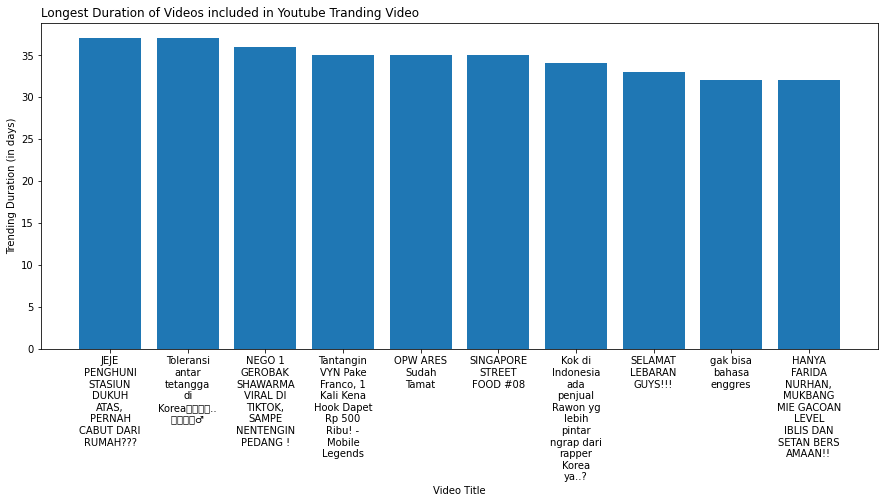

In [62]:
plt.figure(figsize=(15,6))
plt.bar(
    trending_duration.title[:10].apply(lambda title: "\n".join(wrap(title, width=10))),
    trending_duration.trending_duration[:10]
)

plt.title("Longest Duration of Videos included in Youtube Tranding Video", loc="left")
plt.xlabel("Video Title")
plt.ylabel("Trending Duration (in days)")
plt.grid(False)
plt.show

In [63]:
trending_by_title = filtered_trending.groupby("title")
trending_rewind = trending_by_title[['view', 'like', 'dislike']].agg(["min", "max","mean", "sum"])
trending_rewind

view             \
                                                          min        max   
title                                                                      
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...   101823.0   121044.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...  2280620.0  2637486.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...    72434.0   116310.0   
"Grebek rumah harris vriza, dan percintaannya d...    68879.0   163773.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...   393043.0  1348612.0   
...                                                       ...        ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   148668.0   680210.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...   330156.0  7334655.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...   278942.0  1212522.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...   320084.0  1097903.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  1423178.0  2966798.0   

                                                                              \
                                                            mean         sum   
title                                                                          
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...  1.114335e+05    222867.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...  2.459053e+06   4918106.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...  9.390625e+04    375625.0   
"Grebek rumah harris vriza, dan percintaannya d...  1.267565e+05    760539.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  1.126182e+06  14640369.0   
...                                                          ...         ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...  5.519997e+05   8831995.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...  3.414214e+06  34142143.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...  7.948737e+05   5564116.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...  7.562497e+05   4537498.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  2.629831e+06  36817634.0   

                                                        like            \
                                                         min       max   
title                                                                    
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...    1336.0    1456.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...   93348.0  101207.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...     990.0    1432.0   
"Grebek rumah harris vriza, dan percintaannya d...    5529.0    8714.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  127824.0  262846.0   
...                                                      ...       ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   39847.0  101922.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...    2822.0   58066.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...    2790.0   10212.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...    3025.0    8759.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  316849.0  457809.0   

                                                                              \
                                                             mean        sum   
title                                                                          
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...    1396.000000     2792.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...   97277.500000   194555.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...    1228.500000     4914.0   
"Grebek rumah harris vriza, dan percintaannya d...    7486.833333    44921.0   
"Hellevator" Band Cover By Xdinary Heroes (원곡 :...  237112.769231  3082466.0   
...                                                           ...        ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   87227.125000  1395634.0   
🥰 New Gadgets & Versatile Utensils

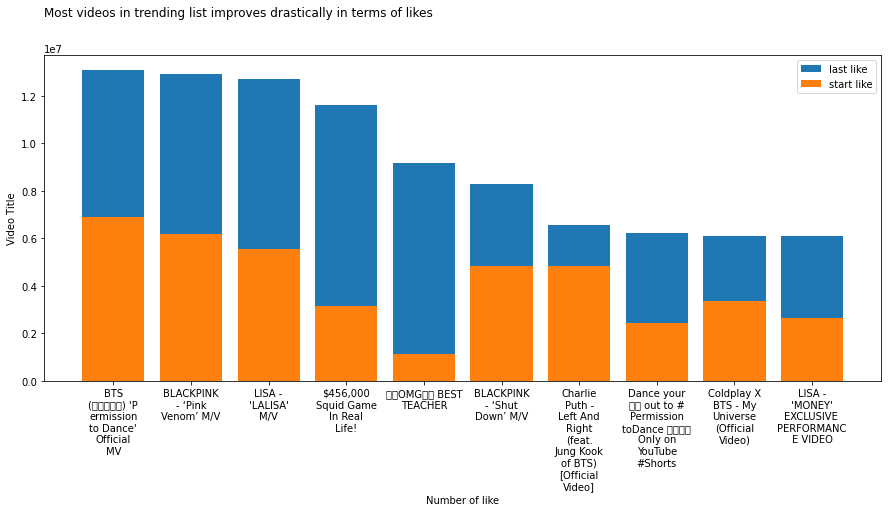

In [64]:
#visualisai trending video teratas masing"

top_10_liked = trending_rewind["like"].sort_values("max", ascending=False).iloc[:10]

plt.figure(figsize=(15, 6))
plt.bar(
top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
top_10_liked["max"],
label="last like"
)
plt.bar(
top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
top_10_liked["min"],
label="start like"
)
plt.title("Most videos in trending list improves drastically in terms of likes", loc="left", y=1.1)
plt.xlabel("Number of like")
plt.ylabel ("Video Title")
plt.legend()
plt.grid(False)
plt.show()

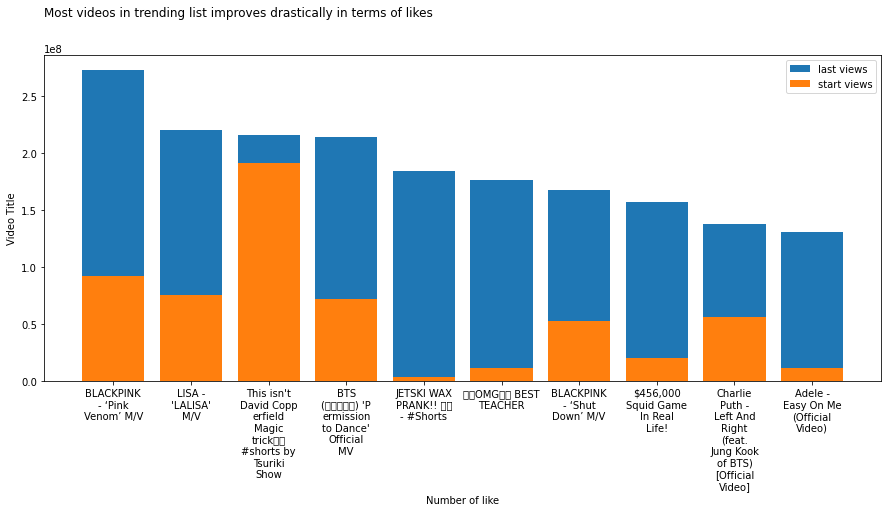

In [21]:
top_10_liked = trending_rewind["view"].sort_values("max", ascending=False).iloc[:10]

plt.figure(figsize=(15,6))
plt.bar(
    top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_liked["max"],
    label="last views")
plt.bar(
    top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_liked["min"],
    label="start views")

plt.title("Most videos in trending list improves drastically in terms of likes", loc="left", y=1.1)
plt.xlabel("Number of like")
plt.ylabel ("Video Title")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Language Detection

In [65]:
sample = filtered_trending.sample(10, random_state=11)
sample[["title", "description"]]

,title,description
50234,MAN CITY 3-0 EVERTON | PREMIER LEAGUE HIGHLIGHTS,Everton fell to defeat at Manchester City in a...
22694,Idgitaf - Berlagak Bahagia (Official Lyric Video),Berlagak Bahagia (Official Lyric Video)\nStrea...
93064,Seharian ngerasain kerjaan jadi SALES HP!,Boleh hape murah kaka...\n\nBarang bekas revie...
47387,UPDATE TERBARU VERSI 1.038.85!! MOTOR BARU LAN...,Hello guys..kita lanjut lagi main Sakura Schoo...
37865,Persaingan Pedagang Bakso – tebar tanah kubura...,Join this channel to get access to perks:\nhtt...
103946,"Melly Goeslaw, Lesti, Nagita Slavina, Celine E...","RUMAH KITA - MELLY GOESLAW, NAGITA SLAVINA, LE..."
53471,"KISAH HARU RUMINI, Meninggal Berpelukan Bersam...","SURYA.co.id, LUMAJANG - Korban meninggal letus..."
103941,EPIC Leon Edwards' coaches inspire him to incr...,Leon Edwards did the unthinkable by defeating ...
42589,TANTANGAN MENGHIAS KEIK || Putar Roda Misterin...,"Kalau kita membayangkan keik, kita pasti ngeba..."
107739,Teaser | Percy Jackson and the Olympians | Dis...,"For more updates, subscribe to Disney, Pixar, ..."


In [66]:
sample["title_lang"] = sample.title.apply(lambda title: langdetect.detect(title.lower()))
sample["desc_lang"] = sample.description.apply(lambda desc: langdetect.detect(desc.lower()))

In [67]:
with pd.option_context("display.max_colwidth", 100):
    display(sample[["title", "title_lang", "description", "desc_lang"]])

,title,title_lang,description,desc_lang
50234,MAN CITY 3-0 EVERTON | PREMIER LEAGUE HIGHLIGHTS,en,Everton fell to defeat at Manchester City in a difficult afternoon at Etihad Stadium. Raheem Ste...,en
22694,Idgitaf - Berlagak Bahagia (Official Lyric Video),en,"Berlagak Bahagia (Official Lyric Video)\nStream ""Berlagak Bahagia"" in your favorite platform: ht...",en
93064,Seharian ngerasain kerjaan jadi SALES HP!,id,Boleh hape murah kaka...\n\nBarang bekas review biasanya saya jual disini: https://invol.co/cl75...,id
47387,UPDATE TERBARU VERSI 1.038.85!! MOTOR BARU LANGSUNG BUAT BALAPAN!! SAKURA SCHOOL SIMULATOR-PART 494,id,Hello guys..kita lanjut lagi main Sakura School Part 494 yaa. Kali ini Sakurani Review UPDATE T...,id
37865,Persaingan Pedagang Bakso – tebar tanah kuburan agar bangkrut #HORORMISTERI | Kartun hantu pocong,id,Join this channel to get access to perks:\nhttps://www.youtube.com/channel/UC7GWXKxiy9_AU9TytEh0...,id
103946,"Melly Goeslaw, Lesti, Nagita Slavina, Celine Evangelista - Rumah Kita | Official Music Video",it,"RUMAH KITA - MELLY GOESLAW, NAGITA SLAVINA, LESTI, CELINE EVANGELISTA\n#RumahKita #PulihLebihCep...",id
53471,"KISAH HARU RUMINI, Meninggal Berpelukan Bersama Ibunya Digulung Wedhus Gembel Semeru",id,"SURYA.co.id, LUMAJANG - Korban meninggal letusan Semeru mulai ditemukan. Dua di antaranya adalah...",id
103941,EPIC Leon Edwards' coaches inspire him to incredible comeback win! | Usman v Edwards 2 | UFC 278,en,Leon Edwards did the unthinkable by defeating Kamaru Usman and becoming the UFC welterweight Cha...,en
42589,TANTANGAN MENGHIAS KEIK || Putar Roda Misterinya! 100 Lapis MAKANAN oleh 123 GO! CHALLENGE,id,"Kalau kita membayangkan keik, kita pasti ngebayangin berlapis-lapis dengan cokelat manis, tabura...",id
107739,Teaser | Percy Jackson and the Olympians | Disney+,en,"For more updates, subscribe to Disney, Pixar, Marvel, Star Wars, and National Geographic.\n \nDi...",en


In [68]:
# pertama mendeteksi bahasa dari sebuah teks

def detect_language(text):
    """Detect language of the 'text'."""
    try: 
        lang = langdetect.detect(text)
        return lang
    except:
        return

In [69]:
filtered_trending["title_lang"] = filtered_trending["title"].apply(detect_language)
filtered_trending["desc_lang"] = filtered_trending["description"].apply(detect_language)

In [70]:
filtered_trending[["title", "title_lang", "description", "desc_lang"]]

,title,title_lang,description,desc_lang
21322,NCT DREAM 엔시티 드림 'Hello Future' MV,it,"NCT DREAM's 1st Album Repackage ""Hello Future""...",en
21323,PART 3 // SUTRISNO DAN ENDANG BAHAGIA,de,Find me on sosial media :\n\nInstagram : https...,en
21324,This isn't David Copperfield Magic trick😂 #sho...,en,Thank you for watching.\nSubscribe to Tsuriki ...,en
21325,Rizky Billar - Pemimpinmu | Official Music Video,en,Rizky Billar - Pemimpinmu | Official Music Vid...,id
21326,Ini Pengakuan Pengemudi Pajero usai Rusak dan ...,id,Polisi menangkap pengemudi SUV yang merusak da...,id
...,...,...,...,...
118746,NASI GORENG BAKAR INI PINDAH SAMPAI 13 KALI KA...,de,HAHHH JUALAN NASI GORENG INI UDAH 13 KALI PIND...,id
118747,"KENAL DEKAT DENGAN KELUARGA NATHALIE, PAPA SAY...",de,"Hi, welcome to Nathalie Holscher Channel!\n\nF...",id
118748,YOUNITE 'Bad Cupid' M/V,en,YOUNITE 'Bad Cupid' M/V\n\n'YOUNI-ON' Availabl...,en
118749,Cover | JAEHYUN - Can't Take My Eyes Off You (...,en,#Cover #JAEHYUN\n#CantTakeMyEyesOffYou #Franki...,en


In [71]:
indo_trending = filtered_trending.loc[
    (filtered_trending.title_lang == "id") | (filtered_trending.desc_lang == "id")
]

with pd.option_context("display.max_columns", None):
    display(indo_trending.sample(10))

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time,title_lang,desc_lang
109563,oMeI7oWvZbc,2022-10-04 10:15:01+00:00,UCuVxJ829ysWH2OhZJiWdnbg,Saya Balik Main Kagura Lagi?! - Mobile Legends,Yuk gabung jadi member channel youtube aku mel...,https://i.ytimg.com/vi/oMeI7oWvZbc/hqdefault.jpg,480.0,360.0,RRQ Lemon,"['lemon', 'rrq lemon', 'lemon rrq', 'team rrq'...",20,none,Saya Balik Main Kagura Lagi?! - Mobile Legends,Yuk gabung jadi member channel youtube aku mel...,PT9M50S,2d,hd,False,True,NaN,NaN,199722.0,9956.0,NaN,0,814.0,2022-10-05 06:01:46.728051+00:00,id,id
96381,IuieSmopjVg,2022-07-27 12:47:35+00:00,UCyW9SCiTYKCF-KCGi83RD3w,Nopek bingung liat harga cafe di PIK? Date sep...,Thank you for watching! Jangan lupa like & com...,https://i.ytimg.com/vi/IuieSmopjVg/hqdefault.jpg,480.0,360.0,Livy Renata,"['Livy Renata', 'alter ego', 'brand ambassador...",20,none,Nopek bingung liat harga cafe di PIK? Date sep...,Thank you for watching! Jangan lupa like & com...,PT20M19S,2d,hd,False,True,NaN,NaN,632359.0,18029.0,NaN,0,1747.0,2022-07-30 06:02:45.467652+00:00,id,en
102927,gF93C9qxPHk,2022-08-15 08:15:12+00:00,UCxv2IqPMhL3kl8cKZWsiMlg,Justy Aldrin - Rumah Par Ale (Official Music V...,"Di atas Tanah Marapu, Tanah Sumba, Prov. NTT ....",https://i.ytimg.com/vi/gF93C9qxPHk/hqdefault.jpg,480.0,360.0,JUSTY ALDRIN OFFICIAL,"['justy aldrin', 'justy aldrin official', 'Rum...",10,none,Justy Aldrin - Rumah Par Ale (Official Music V...,"Di atas Tanah Marapu, Tanah Sumba, Prov. NTT ....",PT5M17S,2d,hd,True,True,NaN,NaN,863145.0,43446.0,NaN,0,1765.0,2022-09-01 06:01:39.460028+00:00,en,id
48804,NaN,2021-11-07 12:00:03+00:00,UCwXPLUOgfDRdDuDQup-mWNQ,VIRAL! MIE PEDAS MEMATIKAN! SAMYANG LOKAL! HAR...,"MIE JEUBEW TEH EMIL\nJl. Pahlawan No.24, Sukag...",NaN,NaN,NaN,Gerry Girianza,"['Bakso', 'Pentol ceker begal', 'Bakso viral',...",22,none,VIRAL! MIE PEDAS MEMATIKAN! SAMYANG LOKAL! HAR...,"MIE JEUBEW TEH EMIL\nJl. Pahlawan No.24, Sukag...",PT26M21S,2d,hd,False,True,NaN,NaN,1143816.0,36925.0,631.0,0,1297.0,2021-11-15 06:02:48.688380+00:00,de,id
98127,wdGJkWKdkas,2022-07-25 07:22:11+00:00,UCpLNlD983zCbsHYQqPPQs4Q,CARA BARU MAIN BEATRIX? DIBIKIN BEGINI JADI SA...,"TOPUP DIAMOND TERMURAH DIBANDING TOKO LAIN, AD...",https://i.ytimg.com/vi/wdGJkWKdkas/hqdefault.jpg,480.0,360.0,leokoce,NaN,20,none,CARA BARU MAIN BEATRIX? DIBIKIN BEGINI JADI SA...,"TOPUP DIAMOND TERMURAH DIBANDING TOKO LAIN, AD...",PT15M54S,2d,hd,False,True,NaN,NaN,368479.0,11530.0,NaN,0,518.0,2022-08-08 06:01:51.313576+00:00,de,id
114353,aaVCD4-K2do,2022-10-27 12:26:40+00:00,UCFuM3BWlLM3YbLjkXBiJ8-A,TUTORIAL MASAK ANTI GAGAL FT. JEROME POLIN,Social Media:\nhttps://www.youtube.com/jessica...,https://i.ytimg.com/vi/aaVCD4-K2do/hqdefault.jpg,480.0,360.0,Jessica Jane,"['JESSICA JANE', 'JESIKA JANE', '24 JAM JESSIC...",24,none,TUTORIAL MASAK ANTI GAGAL FT. JEROME POLIN,Social Media:\nhttps://www.youtube.com/jessica...,PT22M55S,2d,hd,False,True,NaN,NaN,1115992.0,73588.0,NaN,0,3984.0,2022-10-29 06:01:12.885317+00:00,en,id
47021,NaN,2021-10-29 16:45:26+00:00,UCeM5Nksgv9_FXTuZ8jkPJPg,MAS AL SAMPE NGAKAK NGELIHAT REYNA KEBINGUNGAN...,MAS AL SAMPE NGAKAK NGELIHAT REYNA KEBINGUNGAN...,NaN,NaN,NaN,RCTI - ENTERTAINMENT,"['RCTI', 'Dahsyatnya 2020', 'Raffi Ahmad', 'De...",24,none,MAS AL SAMPE NGAKAK NGELIHAT REYNA KEBINGUNGAN...,MAS AL SAMPE NGAKAK NGELIHAT REYNA KEBINGUNGAN...,PT14M13S,2d,hd,False,True,NaN,NaN,1263383.0,16803.0,659.0,0,567.0,2021-11-06 06:05:00.137997+00:00,en,id
99829,jeeU9Jbg_Gw,2022-08-10 12:00:12+00:00,UCkd0ak3k34CPwkQlO2JnijA,SURPRISE DEDE LESTI PAKE MARTABAK?!! | Lilis D...,"Pasukan kepo, jangan lupa subscribe, share, li...",https://i.ytimg.com/vi/jeeU9Jbg_Gw/hqdefault.jpg,480.0,360.0,Lilis Darawangi Official,"['lilis darawangi', 'lilis darawa

In [72]:
data = indo_trending[["title", "description", "category_id"]].reset_index(drop=True)
data

,title,description,category_id
0,Rizky Billar - Pemimpinmu | Official Music Video,Rizky Billar - Pemimpinmu | Official Music Vid...,10
1,Ini Pengakuan Pengemudi Pajero usai Rusak dan ...,Polisi menangkap pengemudi SUV yang merusak da...,25
2,Aksi Demo Tolak Kedatangan Jokowi di Kendari B...,Tanggal Tayang: 30/06/2021\n\nProgram berita h...,25
3,"PERTAMA KALI LIAT SAPI SEGEDE GINI, DINAIKIN D...",Assalamualaikum gaeess..! sudah nonton video s...,15
4,PODKESMAS SAMPAI GA NYAMAN DIBAHAS DISINI - To...,Talk show malam yang akan memberikan informasi...,24
...,...,...,...
38039,Ariel NOAH x Enda Ungu - Yang Terdalam (Live a...,Ariel NOAH x Enda Ungu - Yang Terdalam\n\nOrig...,10
38040,Farel Prayoga Feat Dini Kurnia _CINTA TAK TERP...,Farel Prayoga Feat Dini Kurnia _CINTA TAK TERP...,10
38041,NASI GORENG BAKAR INI PINDAH SAMPAI 13 KALI KA...,HAHHH JUALAN NASI GORENG INI UDAH 13 KALI PIND...,22
38042,"KENAL DEKAT DENGAN KELUARGA NATHALIE, PAPA SAY...","Hi, welcome to Nathalie Holscher Channel!\n\nF...",24


In [73]:
data.drop_duplicates(subset="title", inplace=True)

In [74]:
data.reset_index(drop=True, inplace=True)
data.shape

(6157, 3)

# Feature engineering 

In [3]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install emoji==1.7

In [76]:
import emoji
list_emoji = [e for e in emoji.UNICODE_EMOJI.get("en")]
count = 0 
for em in list_emoji:
    for title in data.title:
        if em in title:
            count += 1
print("How many titles use emoji?", count)

How many titles use emoji? 785


In [77]:
def demojize(text):
    for em in list_emoji:
        if em in text:
            em_text = emoji.demojize(em)
            text = text.replace(em, " " + em_text + " ")
            return text

In [78]:
data["title_emoji"] = data.title.apply(demojize)

In [79]:
title_with_emoji_idx = [
    idx for idx in range(len(data.title))
    for em in list_emoji
    if em in data.loc[idx, "title"]
]

In [80]:
with pd.option_context("display.max_colwidth", 100):
    display(data.loc[title_with_emoji_idx])

,title,description,category_id,title_emoji
33,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih...❤,Saksikan #DariJendelaSMP Setiap Hari Pkl. 16.40 WIB hanya di @Surya Citra Televisi (SCTV) \n@sin...,24,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih.....
78,BIKIN CEWEK TERPESONA 😍 Aksi Heroik Driver Muda Menolong Sopir Yang Kesulitan di Sitinjau Lauik,Aksi heroik driver muda membantu sopir minibus yang kesulitan di Sitinjau Lauik\n\ninstagram : h...,2,BIKIN CEWEK TERPESONA :smiling_face_with_heart-eyes: Aksi Heroik Driver Muda Menolong Sopir Ya...
80,15 MENIT MEMBAKAR LEMAK 1 Kg !!! 24 Jam TIMBANGAN TURUN ✅ ✅ ✅,"15 menit membakar lemak, ok ! siapa yg workout mengharapkan bisa membakar 1 kg lemak dalam 15 me...",26,15 MENIT MEMBAKAR LEMAK 1 Kg !!! 24 Jam TIMBANGAN TURUN :check_mark_button: :check_mark_butto...
148,"WHY‼️ SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast","#somasi #odgj #podcast\nTEMAN TEMAN KONTEN CREATOR, JANGAN TAKUT BERKARYA SELAMA TUJUAN KALIAN B...",24,"WHY :double_exclamation_mark: SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast"
148,"WHY‼️ SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast","#somasi #odgj #podcast\nTEMAN TEMAN KONTEN CREATOR, JANGAN TAKUT BERKARYA SELAMA TUJUAN KALIAN B...",24,"WHY :double_exclamation_mark: SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast"
...,...,...,...,...
6115,Dasar orang Korea...Makan nasi goreng aja bahagia bingit bingit!!🥰🥰,#인도네시아음식#나시고랭#미고랭\nMukbang nasi goreng mie goreng makanan paling dasar Indonesia!!\n\nNasi Goren...,24,Dasar orang Korea...Makan nasi goreng aja bahagia bingit bingit!! :smiling_face_with_hearts: :s...
6116,KITA BEREMPAT MAIN PETAK UMPET DI MAP BUATAN ISTRI 😁,- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...,20,KITA BEREMPAT MAIN PETAK UMPET DI MAP BUATAN ISTRI :beaming_face_with_smiling_eyes:
6124,Semoga HP ini LAKU KERAS 🙏🏻 - Review Zenfone 9 Indonesia,Udah lama ga muji HP sampe segininya.\n\nDapatkan pengalaman baru menikmati Kopi Kapal Api Speci...,28,Semoga HP ini LAKU KERAS :folded_hands: 🏻 - Review Zenfone 9 Indonesia
6124,Semoga HP ini LAKU KERAS 🙏🏻 - Review Zenfone 9 Indonesia,Udah lama ga muji HP sampe segininya.\n\nDapatkan pengalaman baru menikmati Kopi Kapal Api Speci...,28,Semoga HP ini LAKU KERAS :folded_hands: 🏻 - Review Zenfone 9 Indonesia


In [81]:
#delete kolom title

data.drop(columns="title", inplace=True)

# Eksplorasi

In [82]:
desc_with_emoji_idx = [
    idx for idx in range(len(data.description))
    for em in list_emoji
    if em in data.loc[idx, "description"]
]

data["desc_emoji"] = data.description.apply(demojize)

with pd.option_context("display.max_colwidth", 100):
    display(data.loc[desc_with_emoji_idx])

,description,category_id,title_emoji,desc_emoji
0,Rizky Billar - Pemimpinmu | Official Music Video\n\nSurprise Untuk Dede Lesti :\nhttps://youtu.b...,10,None,Rizky Billar - Pemimpinmu | Official Music Video\n\nSurprise Untuk Dede Lesti :\nhttps://youtu.b...
10,"Title: Sempurnakan Hariku \nArtist: Rey Mbayang\nComposser: Rey Mbayang, Trakast\nMusic Arranger...",10,None,"Title: Sempurnakan Hariku \nArtist: Rey Mbayang\nComposser: Rey Mbayang, Trakast\nMusic Arranger..."
11,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...,10,None,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...
11,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...,10,None,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini y...
13,#ByoodeJanganCobaCoba #Byoode #MusicVideo #Girlband #Dangdut\n\nDengerin lagu Byoode - Jangan Co...,10,None,#ByoodeJanganCobaCoba #Byoode #MusicVideo #Girlband #Dangdut\n\nDengerin lagu Byoode - Jangan Co...
...,...,...,...,...
6135,Match antara Manchester City vs Brentford pada Liga Inggris musim 2022/2023 dimenangkan oleh Bre...,17,None,Match antara Manchester City vs Brentford pada Liga Inggris musim 2022/2023 dimenangkan oleh Bre...
6137,"“Khayalan Tingkat Tinggi” bercerita tentang seseorang yang jatuh cinta pada pandangan pertama, t...",10,None,"“Khayalan Tingkat Tinggi” bercerita tentang seseorang yang jatuh cinta pada pandangan pertama, t..."
6139,"#sule #njan #ratu #inibukantalkshow \nJangan lupa subscribe, like, share & comment S-PRO!\n\nLan...",24,None,"#sule #njan #ratu #inibukantalkshow \nJangan lupa subscribe, like, share & comment S-PRO!\n\nLan..."
6142,"Official Music Video MANGKU PUREL""SHEPIN MISA""\nSongwriter by NURBAYAN\nArangger by: DR.STUDIO\...",10,None,"Official Music Video MANGKU PUREL""SHEPIN MISA""\nSongwriter by NURBAYAN\nArangger by: DR.STUDIO\..."


In [83]:
data.drop(columns="description", inplace=True)

In [88]:
data["all_text"] = data["title_emoji"] + " " + data["desc_emoji"]

In [100]:
X_train, X_dev, y_train, y_dev = train_test_split(
    data ["all_text"], data["category_id"], 
    test_size=.2,
    stratify=data ["category_id"],
    random_state=11
)
training_size = X_train.shape[0]
dev_size = X_dev.shape[0]
print(f"{training_size = }.. {dev_size = }")

vectorizer = TfidfVectorizer(
    min_df=.015,
    max_df=.7,
    ngram_range=(1, 1),
)
train_tfidf = vectorizer.fit_transform(X_train)
dev_tfidf = vectorizer.transform(X_dev)
print("Got train tf-idf with shape:", train_tfidf.shape)
print("Got dev tf-idf with shape:", dev_tfidf.shape)

train_tfidf = pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
dev_tfidf = pd.DataFrame(dev_train.toarray(), columns=vectorizer.get_feature_names_out())

training_size = 4925.. dev_size = 1232


ValueError: np.nan is an invalid document, expected byte or unicode string.

## Model Training & Evaluation

In [101]:
dict_models = {
"logistic_regression": LogisticRegression(),
"naive_bayes": MultinomialNB(),
"svm": LinearSVC(random_state=11),
"decision_tree": DecisionTreeClassifier(random_state=11),
"random_forest": RandomForestClassifier(random_state=11)
}

In [102]:
for model in dict_models.values():
    print(f"-- {model.__class__.__name__} --") 
    model.fit(train_tfidf, y_train)
y_pred = model.predict(dev_tfidf)
print("Reports on dev set:", classification_report(y_dev, y_pred), sep="\n")

-- LogisticRegression --


NameError: name 'train_tfidf' is not defined

## LinearSVC

In [39]:
svm_grid_search = GridSearchCV(
dict_models["svm"],
{"C": (10, 1, .1, .05, .01)},
)
svm_grid_search.fit(train_tfidf, y_train)
svm_pred_dev = svm_grid_search.predict(dev_tfidf)
print("Reports on train set:",
classification_report(
y_train,
svm_grid_search.predict(train_tfidf)
), sep="\n")
print("Reports on dev set:", classification_report(y_dev, svm_pred_dev), sep="\n")

NameError: name 'train_tfidf' is not defined

In [ ]:
svm_grid_search.best_params_

## RandomForestClassifier

In [18]:
random_forest_grid_search = GridSearchCV(
dict_models["random_forest"],
{
"n_estimators": (10, 20, 25, 50, 75, 100, 125),
"max_depth": (5, 10, 25, 50),
}
)
random_forest_grid_search.fit(train_tfidf, y_train)
random_forest_pred = random_forest_grid_search.predict(dev_tfidf)
print("Reports on train set:",
classification_report(
y_train,
random_forest_grid_search.predict(train_tfidf)
),
sep="\n"
)
print("Reports on dev set:", classification_report(y_dev, random_forest_pred), sep="\n")

NameError: name 'train_tfidf' is not defined

In [ ]:
random_forest_grid_search.best_params_

## Save Model

In [ ]:
model = Pipeline([
("vectorizer", TfidfVectorizer(
min_df=.015,
max_df=.7,
ngram_range=(1, 1),
)),
("model", RandomForestClassifier(
max_depth=50,
n_estimators=75,
random_state=11
))
])
# training
model.fit(X_train, y_train)
pred = model.predict(X_dev)
print("Reports on train set:",
classification_report(
y_train,
model.predict(X_train)
),
sep="\n"
)
print("Reports on dev set:", classification_report(y_dev, pred), sep="\n")

In [ ]:
joblib.dump(model, "/modelyt.joblib")

In [ ]:
model = joblib.load("modelyt.joblib")
print(model.get_params())

In [ ]:
preds = model.predict(X_dev)
print(classification_report(y_dev, preds))